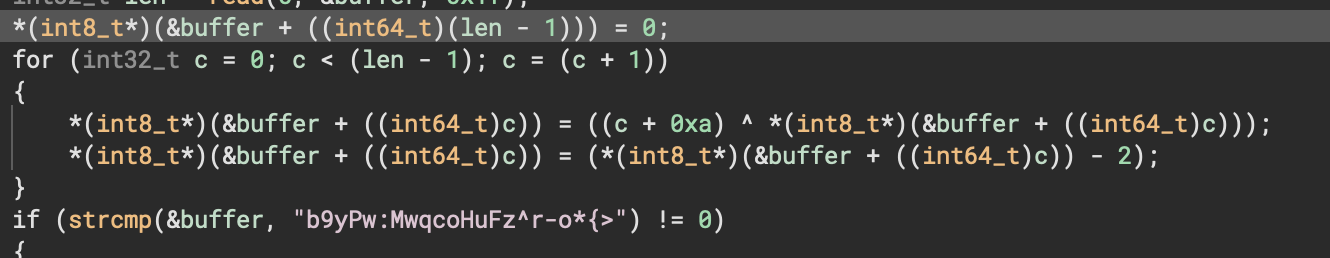

In [86]:
buffer = bytearray("n0w_w3_have_a_dyn4m1c_","ASCII")

for c,x in enumerate(buffer):
    buffer[c] = ((c + 0xa) ^ buffer[c]) % 256
    buffer[c] = buffer[c] - 2 % 256

result = "b9yPw:MwqcoHuFz^r-o*{>"

In [87]:
buffer

bytearray(b'b9yPw:MwqcoHuFz^r-o*{>')

In [113]:
import z3

In [117]:
s = z3.Solver()
y = [z3.BitVecVal(x,8) for x in bytes.fromhex("62397950773a4d7771636f4875467a5e722d6f2a7b3e49105900")]
x = [z3.BitVec(f"{i}",8) for i in range(len(y))]

In [118]:
for i in range(len(y)):
    s.add(y[i] == ((i + 0xa) ^ x[i]) - 2) 

In [119]:
s.check()
mod = s.model()

In [121]:
res=[0]*len(y)
for x in mod:
    res[int(x.name())] = int(mod[x].as_long())
flag = bytes(res)

In [122]:
flag

b'n0w_w3_have_a_dyn4m1c_k3y!'

In [107]:
from pwn import *

In [112]:
r = remote("9edd1c2e5c9b1369323323be-intro-rev-3.challenge.master.cscg.live",31337,ssl=True)
print(r.recvline())
r.send(flag)
print(r.recv())

[x] Opening connection to 9edd1c2e5c9b1369323323be-intro-rev-3.challenge.master.cscg.live on port 31337
[x] Opening connection to 9edd1c2e5c9b1369323323be-intro-rev-3.challenge.master.cscg.live on port 31337: Trying 147.75.102.165
[+] Opening connection to 9edd1c2e5c9b1369323323be-intro-rev-3.challenge.master.cscg.live on port 31337: Done
b'Give me your password: \n'
b'Thats not the password!\n'
